In [109]:
import os
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pybullet as p
import tensorflow as tf

from ravens.utils import utils

In [28]:
with open("dataset/block-insertion-train/info/000000-0.pkl", "rb") as file:
    info = pickle.load(file)
info[0]


{6: ((0.5062500000000001, 0.140625, 0.02),
  (0.0, 0.0, 0.9900753005916922, -0.14053789225070315),
  (0.1, 0.002, 0.04)),
 5: ((0.453125, 0.04062500000000002, 0.02),
  (0.0, 0.0, -0.7800583048932599, 0.6257068330832372),
  (0.08, 0.03, 0.04))}

In [37]:
data[1]


(0,
 {6: ((0.346875, -0.203125, 0.02),
   (0.0, 0.0, 0.9994215142079772, -0.03400936544885752),
   (0.1, 0.002, 0.04)),
  5: ((0.31874408507318286, -0.2436144665959519, 0.054990036219263856),
   (0.4838420095668064,
    0.5156174262665012,
    0.5156541143325928,
    0.48387644484985304),
   (0.08, 0.03, 0.04))})

In [19]:
path_to_predictions = "predictions/block-insertion-transporter-100-0/"

task = "block-insertion"
agent = "transporter"
n_demos = 10
train_run = 0
name = f"{task}-{agent}-{n_demos}-{train_run}"

# Load and print results to console.
curve = []
for fname in tf.io.gfile.listdir(path_to_predictions):
    fname = os.path.join(path_to_predictions, fname)
    if name in fname and ".pkl" in fname:
        n_steps = int(fname[(fname.rfind("-") + 1) : -4])
        data = pickle.load(open(fname, "rb"))
        rewards = []
        for reward, _ in data:
            rewards.append(reward)
        score = np.mean(rewards)
        std = np.std(rewards)
        curve.append((n_steps, score, std))
    curve.sort()
    # for log in curve:
    #     print(f'  {log[0]} steps:\t{log[1]:.2f}%\t± {log[2]:.2f}%')

# Plot results over training steps.
title = f"{agent} on {task} w/ {n_demos} demos"
ylabel = "Testing Task Success (%)"
xlabel = "# of Training Steps"

logs = {}
curve = np.array(curve)
logs[name] = (curve[:, 0], curve[:, 1], curve[:, 2])
fname = os.path.join(path_to_predictions, f"{name}-plot.png")
utils.plot(fname, title, ylabel, xlabel, data=logs, ylim=[0, 1.3])
print(f"Done. Plot image saved to: {fname}")


Done. Plot image saved to: predictions/block-insertion-transporter-10-0/block-insertion-transporter-10-0-plot.png


<Figure size 640x480 with 0 Axes>

In [124]:
np.exp(1j * place_orientations[0])

array([ 0.72009165+0.69387896j,  0.46712637+0.88419057j,
        0.34128316+0.93996053j, -0.88581296-0.46404246j,
        0.67276837+0.73985317j,  0.14270897-0.98976469j,
       -0.88795739+0.45992572j,  0.38733028+0.92194103j])

(0.30484375, 0.6795312500000001, -0.47078125, 0.46765625000000005)

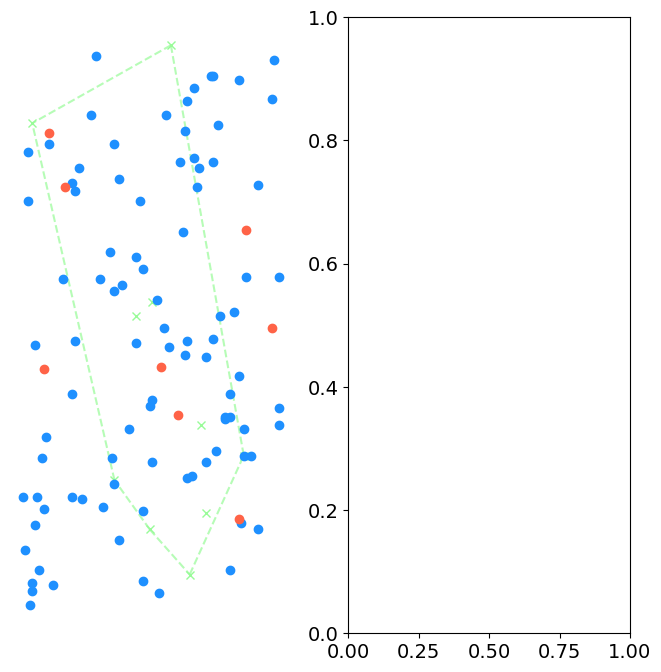

In [119]:
from scipy.spatial import ConvexHull

np.random.seed(train_run)
tf.random.set_seed(train_run)

episodes = np.random.choice(1000, n_demos, False)
path_to_infos = Path("dataset/block-insertion-train/info/")

data = pickle.load(
    open(
        Path("predictions/block-insertion-transporter-10-0/")
        / f"{task}-{agent}-{n_demos}-{train_run}-200.pkl",
        "rb",
    )
)

place_positions = {-1: [], 0: [], 1: []}
place_orientations = {-1: [], 0: [], 1: []}
for episode in episodes:
    info_path = [
        f for f in path_to_infos.glob("{:>6}*.pkl".format(episode).replace(" ", "0"))
    ][0]
    with open(info_path, "rb") as file:
        info = pickle.load(file)
    place_positions[-1].append(info[0][6][0])
    place_orientations[-1].append(p.getEulerFromQuaternion(info[0][6][1]))

for episode_info in data:
    place_positions[episode_info[0]].append(episode_info[1][6][0])
    place_orientations[episode_info[0]].append(p.getEulerFromQuaternion(episode_info[1][6][1]))

place_positions = {k: np.array(v)[:, :2] for k, v in place_positions.items()}
place_orientations = {k: np.array(v)[:, 2] for k, v in place_orientations.items()}
hull = ConvexHull(place_positions[-1])

fig, axs = plt.subplots(1, 2, figsize=(8, 8))
axs[0].plot(
    place_positions[-1][:, 0],
    place_positions[-1][:, 1],
    "x",
    color="palegreen",
    alpha=1,
)
for simplex in hull.simplices:
    axs[0].plot(
        place_positions[-1][simplex, 0],
        place_positions[-1][simplex, 1],
        "--",
        color="palegreen",
        alpha=0.7,
    )
axs[0].plot(
    place_positions[1][:, 0],
    place_positions[1][:, 1],
    "o",
    color="dodgerblue",
)
axs[0].plot(place_positions[0][:, 0], place_positions[0][:, 1], "o", color="tomato")


axs[1].plot(
    np.real(np.exp(1j * place_orientations[0])),
    np.imag(np.exp(1j * place_orientations[0])),
    "x",
    color="palegreen",
    alpha=1,
)
axs[1].plot(
    place_positions[1][:, 0],
    place_positions[1][:, 1],
    "o",
    color="dodgerblue",
)
axs[1].plot(place_positions[0][:, 0], place_positions[0][:, 1], "o", color="tomato")

axs[0].axis("off")


In [40]:
import pickle

with open(
    "predictions/block-insertion-transporter-10-0/block-insertion-transporter-10-0-50.pkl",
    "rb",
) as file:
    data = pickle.load(file)
data[1]


(0,
 {6: ((0.346875, -0.203125, 0.02),
   (0.0, 0.0, 0.9994215142079772, -0.03400936544885752),
   (0.1, 0.002, 0.04)),
  5: ((0.31874408507318286, -0.2436144665959519, 0.054990036219263856),
   (0.4838420095668064,
    0.5156174262665012,
    0.5156541143325928,
    0.48387644484985304),
   (0.08, 0.03, 0.04))})

In [30]:
from pathlib import Path

all_n_steps = []
path_to_checkpoints = Path("checkpoints/block-insertion-transporter-100-0")
files = [f for f in path_to_checkpoints.glob("**/*") if f.is_file()]
for file in files:
    # print(file)
    n_steps = int(str(file.stem).split("-")[-1])
    if n_steps == 0 or (n_steps % 200 == 0 and n_steps <= 2000):
        if n_steps not in all_n_steps:
            all_n_steps.append(n_steps)
            print(
                f"python ravens/test.py --assets_root=./ravens/environments/assets/ --disp=False --task=block-insertion --agent=transporter --n_demos=100 --n_steps={n_steps} --data_dir=../dataset/ --root_dir=../"
            )


python ravens/test.py --assets_root=./ravens/environments/assets/ --disp=False --task=block-insertion --agent=transporter --n_demos=100 --n_steps=1400 --data_dir=../dataset/ --root_dir=../
python ravens/test.py --assets_root=./ravens/environments/assets/ --disp=False --task=block-insertion --agent=transporter --n_demos=100 --n_steps=800 --data_dir=../dataset/ --root_dir=../
python ravens/test.py --assets_root=./ravens/environments/assets/ --disp=False --task=block-insertion --agent=transporter --n_demos=100 --n_steps=600 --data_dir=../dataset/ --root_dir=../
python ravens/test.py --assets_root=./ravens/environments/assets/ --disp=False --task=block-insertion --agent=transporter --n_demos=100 --n_steps=400 --data_dir=../dataset/ --root_dir=../
python ravens/test.py --assets_root=./ravens/environments/assets/ --disp=False --task=block-insertion --agent=transporter --n_demos=100 --n_steps=1000 --data_dir=../dataset/ --root_dir=../
python ravens/test.py --assets_root=./ravens/environments/

In [ ]:
python ravens/test.py --assets_root=./ravens/environments/assets/ --disp=False --task=block-insertion --agent=transporter --n_demos=100 --n_steps=1400 --data_dir=../dataset/ --root_dir=../
python ravens/test.py --assets_root=./ravens/environments/assets/ --disp=False --task=block-insertion --agent=transporter --n_demos=100 --n_steps=800 --data_dir=../dataset/ --root_dir=../
python ravens/test.py --assets_root=./ravens/environments/assets/ --disp=False --task=block-insertion --agent=transporter --n_demos=100 --n_steps=600 --data_dir=../dataset/ --root_dir=../
python ravens/test.py --assets_root=./ravens/environments/assets/ --disp=False --task=block-insertion --agent=transporter --n_demos=100 --n_steps=400 --data_dir=../dataset/ --root_dir=../
python ravens/test.py --assets_root=./ravens/environments/assets/ --disp=False --task=block-insertion --agent=transporter --n_demos=100 --n_steps=1000 --data_dir=../dataset/ --root_dir=../
python ravens/test.py --assets_root=./ravens/environments/assets/ --disp=False --task=block-insertion --agent=transporter --n_demos=100 --n_steps=1800 --data_dir=../dataset/ --root_dir=../
python ravens/test.py --assets_root=./ravens/environments/assets/ --disp=False --task=block-insertion --agent=transporter --n_demos=100 --n_steps=200 --data_dir=../dataset/ --root_dir=../
python ravens/test.py --assets_root=./ravens/environments/assets/ --disp=False --task=block-insertion --agent=transporter --n_demos=100 --n_steps=1200 --data_dir=../dataset/ --root_dir=../
python ravens/test.py --assets_root=./ravens/environments/assets/ --disp=False --task=block-insertion --agent=transporter --n_demos=100 --n_steps=2000 --data_dir=../dataset/ --root_dir=../
python ravens/test.py --assets_root=./ravens/environments/assets/ --disp=False --task=block-insertion --agent=transporter --n_demos=100 --n_steps=1600 --data_dir=../dataset/ --root_dir=../